# Result Analysis

In [1]:
import os
import sys
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Add src_path to the system path
sys.path.insert(0, src_path)

# Now you can import your module
import scripts.graph_utils as gru

In [2]:
# Plot line chart of Z-scores for each graph_name
def plot_line_chart(data, title, x_label, y_label):
    fig = go.Figure()
    for graph_name in data["graph_name"].unique():
        df = data[data["graph_name"] == graph_name]
        fig.add_trace(
            go.Scatter(
                x=df["motif"], y=df[y_label], mode="lines+markers", name=graph_name
            )
        )
    fig.update_layout(title=title, xaxis_title=x_label, yaxis_title=y_label)
    fig.show()

### Load Data

In [3]:
# Data path directory
RESULTS_PATH = "../../results/"
NETWORKS_PATH = "../../data/"

In [4]:
# Load data
def load_data(file):
    data = pd.read_csv(RESULTS_PATH + file)
    return data

## Twitter Egonets

In [5]:
# Load the Twitter data
file_name = "twitter.csv"
motif_twitter = load_data(file_name)
# cast graph_name as string
motif_twitter["graph_name"] = motif_twitter["graph_name"].astype(str)

In [6]:
motif_twitter

,graph_name,motif,average_count,standard_deviation,z_score,significance_profile,nodes,edges,max_degree,avg_degree
0,256497288,motif_1,52435.44,887.535214,22.877470,0.011187,213.0,17930.0,177.5,168.356808
1,256497288,motif_2,36026.44,646.921175,1.198848,0.000586,213.0,17930.0,177.5,168.356808
2,256497288,motif_3,72416.32,1275.567250,-28.681608,-0.014026,213.0,17930.0,177.5,168.356808
3,256497288,motif_4,24514.04,563.694545,50.319735,0.024607,213.0,17930.0,177.5,168.356808
4,256497288,motif_5,33661.00,741.003430,127.988611,0.062588,213.0,17930.0,177.5,168.356808
...,...,...,...,...,...,...,...,...,...,...
1490,111045742,motif_9,482.44,44.499139,48.170820,0.076639,149.0,3380.0,65.5,45.369128
1491,111045742,motif_10,577.92,41.198625,81.169700,0.129140,149.0,3380.0,65.5,45.369128
1492,111045742,motif_11,877.88,76.263971,6.072592,0.009661,149.0,3380.0,65.5,45.369128
1493,111045742,motif_12,354.12,50.406944,135.832079,0.216106,149.0,3380.0,65.5,45.369128


### Twitter Original Egonets

In [7]:
# Plot only the original graphs of Twitter
plot_line_chart(
    motif_twitter[~motif_twitter["graph_name"].str.contains("sample")],
    f"Z-scores for Twitter Original Graphs from {file_name}",
    "motif",
    "significance_profile",
)

In [8]:
motif_twitter.query(
        "graph_name.str.contains('sample') == False and motif == 'motif_1'"
        )[['graph_name', 'nodes', 'edges', 'max_degree', 'avg_degree']]

,graph_name,nodes,edges,max_degree,avg_degree
0,256497288,213.0,17930.0,177.5,168.356808
13,86775971,154.0,5811.0,96.5,75.467532
26,14338082,215.0,3237.0,135.5,30.111628
39,7861312,220.0,4740.0,78.5,43.090909
52,14203895,215.0,3640.0,85.0,33.860465
1365,311227912,35.0,276.0,24.5,15.771429
1378,100318079,220.0,8354.0,110.0,75.945455
1391,20060293,243.0,7542.0,120.5,62.074074
1404,39070445,67.0,654.0,37.5,19.522388
1417,98633794,141.0,2354.0,64.5,33.390071


## Twitter Samples

In [9]:
sample_percents = ["40", "30", "20", "10"]

selected_graph = "86775971"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    plot_line_chart(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "motif",
        "significance_profile",
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 'motif_1'")
    )

                  graph_name    motif  nodes   edges
13                  86775971  motif_1  154.0  5811.0
858    86775971_sample_rn_40  motif_1   61.0   742.0
923   86775971_sample_rpn_40  motif_1   48.0   772.0
949    86775971_sample_rj_40  motif_1   60.0  1568.0
1014  86775971_sample_bsf_40  motif_1   61.0  1606.0
1274  86775971_sample_sff_40  motif_1   61.0  2099.0


                  graph_name    motif  nodes   edges
13                  86775971  motif_1  154.0  5811.0
273    86775971_sample_rj_30  motif_1   46.0   894.0
507    86775971_sample_rn_30  motif_1   46.0   472.0
533   86775971_sample_rpn_30  motif_1   42.0   585.0
819   86775971_sample_bsf_30  motif_1   46.0  1065.0
1222  86775971_sample_sff_30  motif_1   46.0  1071.0


                  graph_name    motif  nodes   edges
13                  86775971  motif_1  154.0  5811.0
624    86775971_sample_rj_20  motif_1   29.0   450.0
650   86775971_sample_bsf_20  motif_1   30.0   459.0
754   86775971_sample_rpn_20  motif_1   23.0   198.0
884    86775971_sample_rn_20  motif_1   27.0   196.0
1313  86775971_sample_sff_20  motif_1   30.0   384.0


                  graph_name    motif  nodes   edges
13                  86775971  motif_1  154.0  5811.0
299   86775971_sample_bsf_10  motif_1   15.0    55.0
403    86775971_sample_rj_10  motif_1   15.0    55.0
572   86775971_sample_rpn_10  motif_1   14.0    67.0
1001   86775971_sample_rn_10  motif_1   14.0    51.0
1144  86775971_sample_sff_10  motif_1   15.0    99.0


In [10]:
sample_percents = ["40", "30", "20", "10"]

selected_graph = "14203895"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    plot_line_chart(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "motif",
        "significance_profile",
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 'motif_1'")
    )

                  graph_name    motif  nodes   edges
52                  14203895  motif_1  215.0  3640.0
65    14203895_sample_bsf_40  motif_1   86.0  2017.0
78     14203895_sample_rn_40  motif_1   80.0   400.0
676    14203895_sample_rj_40  motif_1   86.0  1528.0
936   14203895_sample_rpn_40  motif_1   59.0   618.0
1248  14203895_sample_sff_40  motif_1   86.0  1491.0


                  graph_name    motif  nodes   edges
52                  14203895  motif_1  215.0  3640.0
286    14203895_sample_rn_30  motif_1   60.0   332.0
728    14203895_sample_rj_30  motif_1   62.0   803.0
975   14203895_sample_bsf_30  motif_1   64.0   937.0
1027  14203895_sample_rpn_30  motif_1   48.0   409.0
1196  14203895_sample_sff_30  motif_1   64.0  1427.0


                  graph_name    motif  nodes   edges
52                  14203895  motif_1  215.0  3640.0
195   14203895_sample_bsf_20  motif_1   43.0   311.0
364    14203895_sample_rn_20  motif_1   35.0   136.0
416    14203895_sample_rj_20  motif_1   43.0   389.0
429   14203895_sample_rpn_20  motif_1   29.0   196.0
1352  14203895_sample_sff_20  motif_1   43.0   369.0


                  graph_name    motif  nodes   edges
52                  14203895  motif_1  215.0  3640.0
91    14203895_sample_bsf_10  motif_1   21.0   134.0
260    14203895_sample_rj_10  motif_1   21.0   106.0
611   14203895_sample_rpn_10  motif_1   17.0    43.0
871    14203895_sample_rn_10  motif_1   16.0    31.0
1183  14203895_sample_sff_10  motif_1   21.0   204.0


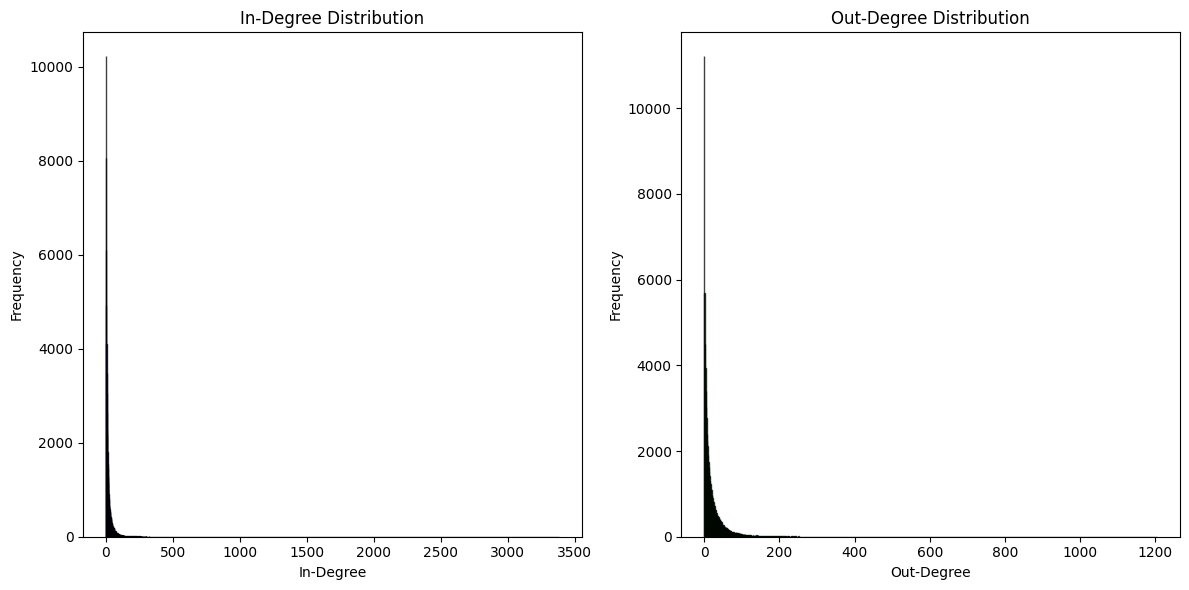

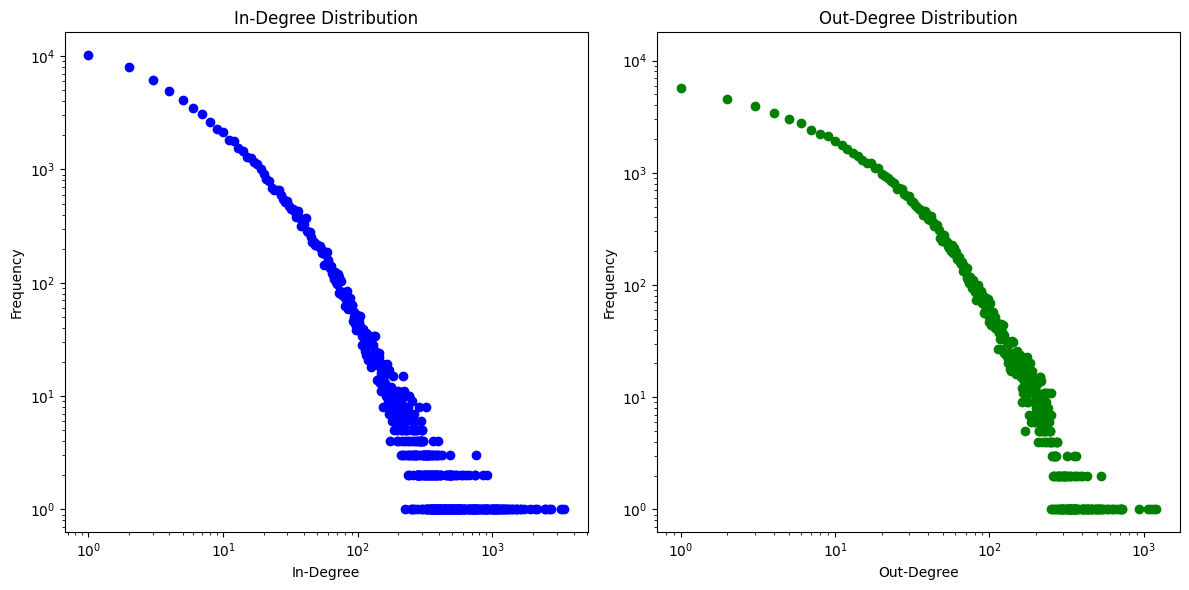

In [11]:
twitter_combined = gru.read_directed_graph_from_edge_list("../../data/twitter/twitter_combined.edges")
gru.plot_degree_distribution(twitter_combined)
gru.plot_degree_distribution_scatter(twitter_combined)

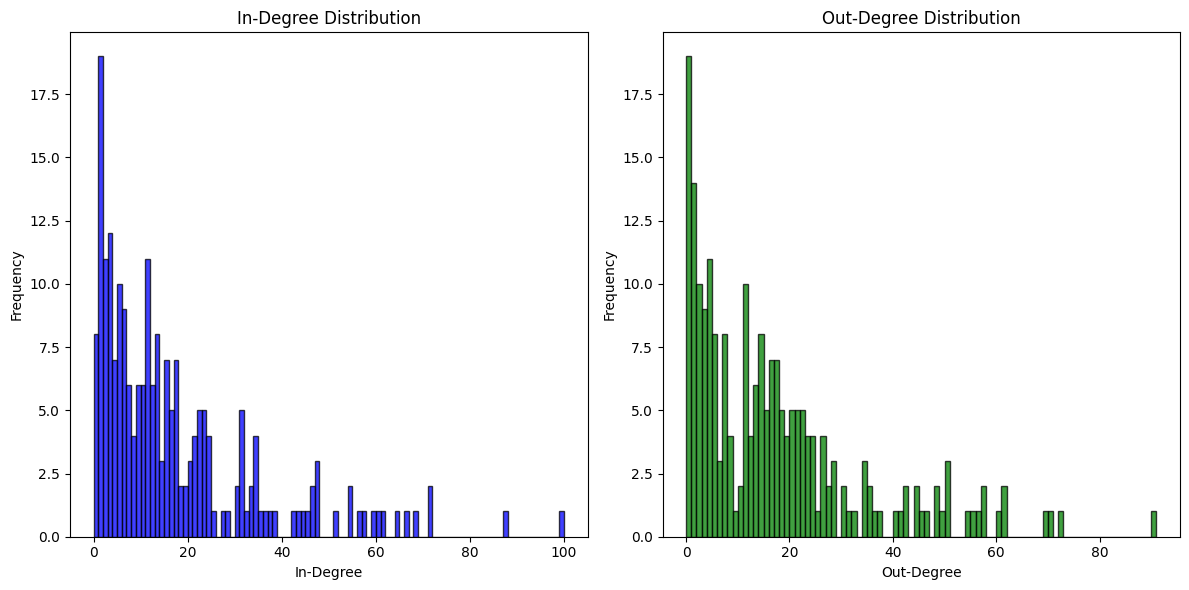

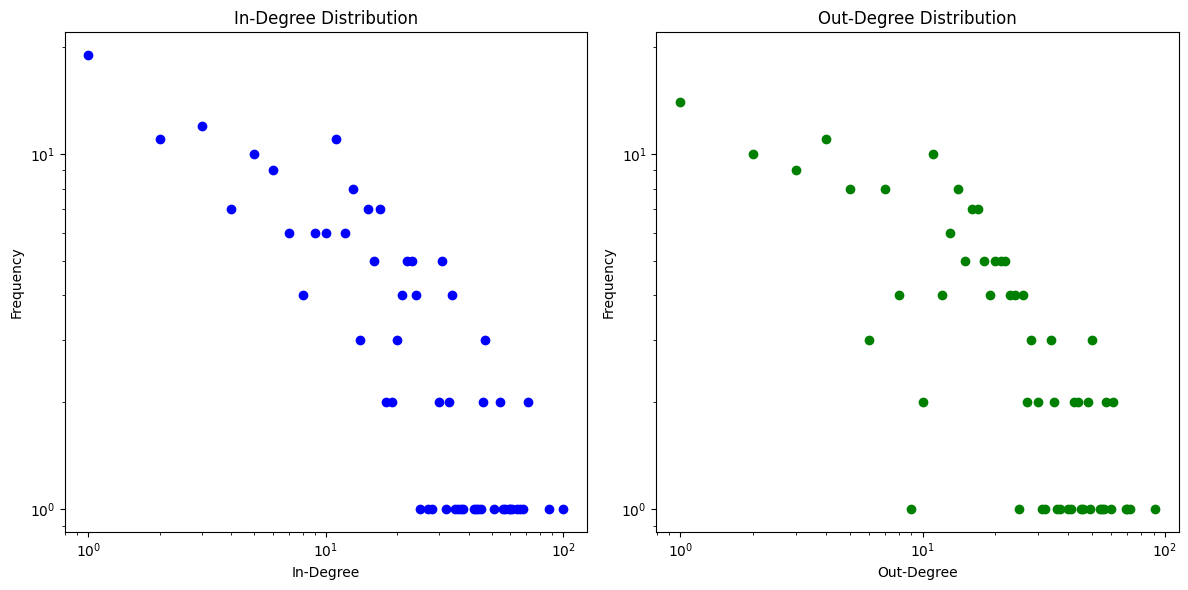

In [12]:
twitter_ego = gru.read_directed_graph_from_edge_list("../../data/twitter/14203895.edges")
gru.plot_degree_distribution(twitter_ego)
gru.plot_degree_distribution_scatter(twitter_ego)

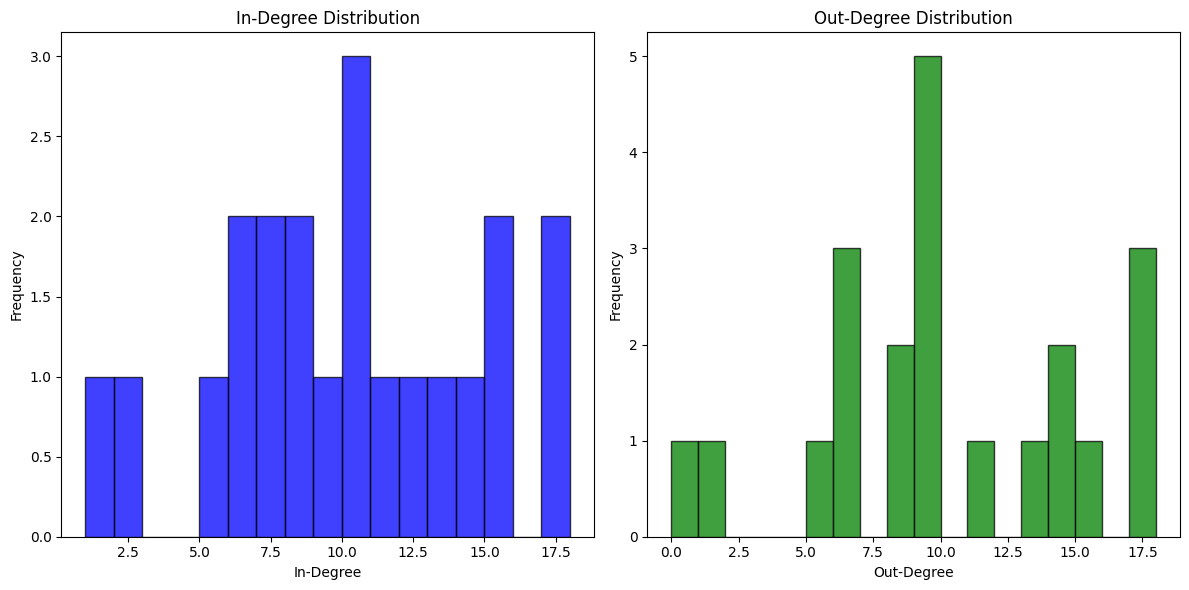

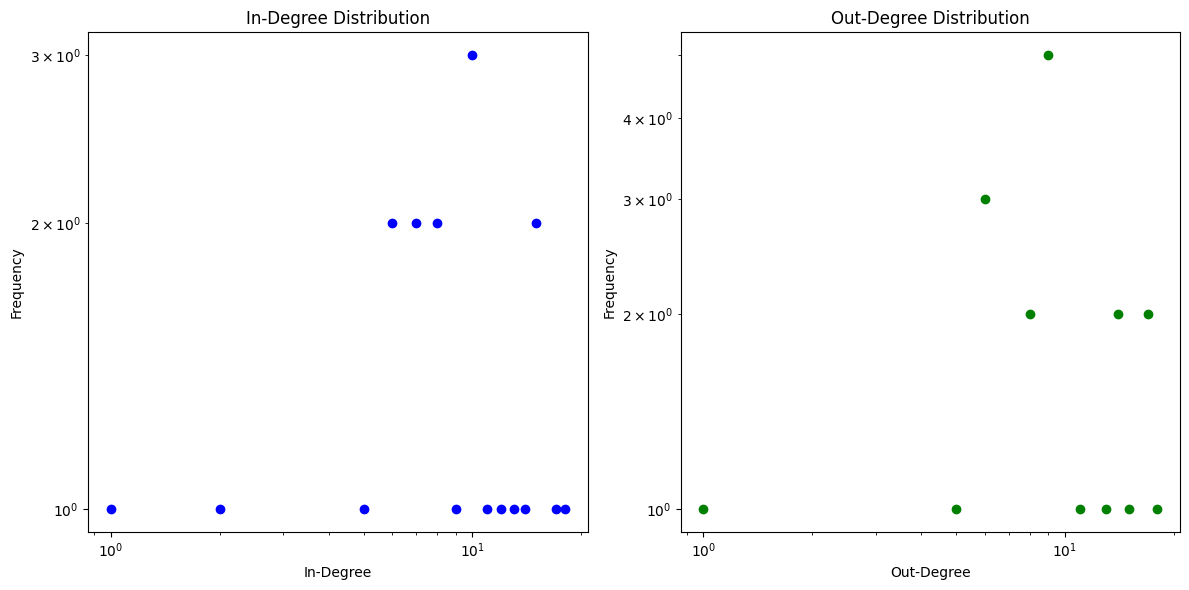

In [13]:
twitter_ssf_10 = gru.read_directed_graph_from_edge_list("../../data/twitter_samples/14203895_sample_sff_10.edges")
gru.plot_degree_distribution(twitter_ssf_10)
gru.plot_degree_distribution_scatter(twitter_ssf_10)